In [85]:
import numpy as np
import pandas as pd
# import talib as ta
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.decomposition import PCA
from numpy import linalg as LA
from tqdm import *
import math as math

import xgboost as xgb 
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [86]:
df = pd.read_excel('bmw.xlsx')

In [87]:
#Discard rows and columns containing null values
df = df.dropna(how='any')

In [88]:
#sort by date
df = df.sort_values(by='时间')

In [89]:
choose_factor = [i for i in df.columns if i not in ['真实值','时间','Z_SPREAD','Z-SPREAD_TOMORROW',]]

In [90]:
choose_feature = df[choose_factor]

In [91]:
choose_feature

,OPEN,HIGH,LOW,CLOSE,YTM
0,100.131,100.172,100.096,100.142,0.442
1,100.143,100.274,100.143,100.265,0.392
2,100.269,100.581,100.229,100.551,0.275
3,100.559,100.830,100.545,100.806,0.171
4,100.806,101.111,100.772,101.103,0.050
...,...,...,...,...,...
281,101.288,101.289,101.272,101.284,-0.427
282,101.284,101.302,101.273,101.300,-0.440
283,101.298,101.302,101.285,101.296,-0.439
284,101.293,101.306,101.286,101.300,-0.448


In [92]:
choose_label = df['真实值']

In [93]:
X_train = choose_feature.tail(240)
y_train = choose_label.tail(240)

X_test = choose_feature.head(45)
y_test = choose_label.head(45)

In [94]:
import xgboost as xgb 
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [95]:
# from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [96]:
#Data standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression  # 线性回归
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

model.fit(X_train,y_train)   # 线性回归建模
predicted = model.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 0.07616235608532204
Mean Squared Error: 0.010410936107478319
Root Mean Squared Error: 0.1020339948619004


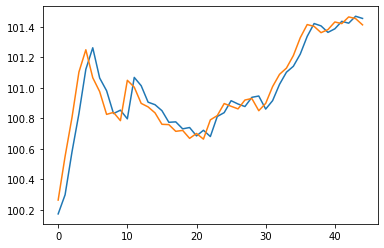

In [97]:
x = np.arange(45)
plt.plot(x, predicted)
plt.plot(x, y_test)

In [98]:
# View features
importances = regressor.feature_importances_ 
importances_df = pd.DataFrame([choose_factor, importances], index=['Features', 'Importances']).T
importances_df.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
3,CLOSE,0.801592
1,HIGH,0.0699717
2,LOW,0.0634722
0,OPEN,0.0576324
4,YTM,0.00733178


In [99]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train a random forest to solve regression problems
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluate regression performance
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.34961233333326647
Mean Squared Error: 0.17745711515827378
Root Mean Squared Error: 0.4212565906407564


In [100]:
importances = regressor.feature_importances_ 
importances_df = pd.DataFrame([choose_factor, importances], index=['Features', 'Importances']).T
importances_df.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
3,CLOSE,0.801592
1,HIGH,0.0699717
2,LOW,0.0634722
0,OPEN,0.0576324
4,YTM,0.00733178


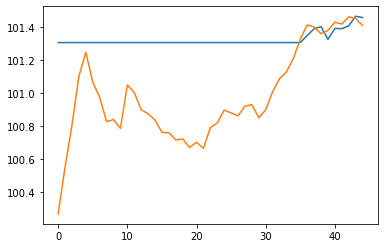

In [101]:
x = np.arange(45)
plt.plot(x, y_pred)
plt.plot(x, y_test)